In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyAgrum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 28.6 MB/s eta 0:00:00


In [3]:
import pickle
import pyagrum.skbn as skbn
import pyagrum.lib.notebook as gnb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
rs=1234
sns.set_palette("colorblind")

In [4]:
# Load train/test sets
with open('/content/drive/MyDrive/Colab Notebooks/MISY331/X_train.p', 'rb') as f:
    X_train = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/MISY331/X_test.p', 'rb') as f:
    X_test = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/MISY331/y_train.p', 'rb') as f:
    y_train = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/MISY331/y_test.p', 'rb') as f:
    y_test = pickle.load(f)

In [5]:
Train = pd.concat([X_train, y_train], axis=1)
Test = pd.concat([X_test, y_test], axis=1)
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MISY331/digital_marketing_campaign_dataset_cleaned.csv")

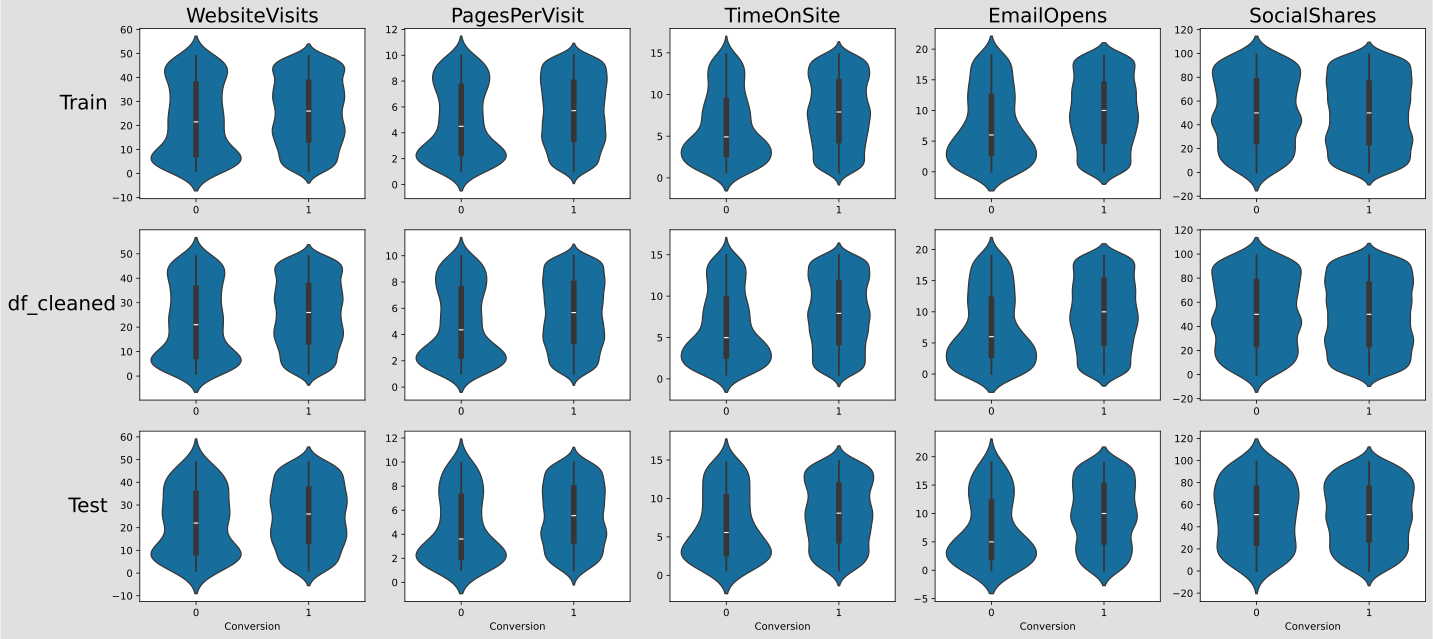

In [9]:
metrics = ['WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'EmailOpens', 'SocialShares']
datasets = {'Train': Train, 'df_cleaned': df, 'Test': Test}

# Switched the order: rows correspond to datasets, columns correspond to metrics
fig, axes = plt.subplots(len(datasets), len(metrics), figsize=(len(metrics) * 4, len(datasets) * 3))

# Adjusted the loops to iterate through datasets in the outer loop and metrics in the inner loop
for i, (dataset_name, dataset) in enumerate(datasets.items()):
    for j, metric in enumerate(metrics):
        ax = axes[i, j]

        # In all cases, the x-axis should be the 'Conversion' column from the current dataset
        # and the y-axis should be the current 'metric' column from the current dataset.
        sns.violinplot(x=dataset['Conversion'], y=dataset[metric], ax=ax)

        # Only title the top-most plots
        if i == 0:
            ax.set_title(metric, fontsize=20)

        # Only label the left-most plots
        if j == 0:
            ax.set_ylabel(dataset_name, fontsize=20, rotation=0, ha='right')
        else:
            ax.set_ylabel('')

        # Remove x-axis labels for all but the last row
        if i < len(datasets) - 1:
            ax.set_xlabel('')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/MISY331/violin_plots.png')
plt.show()

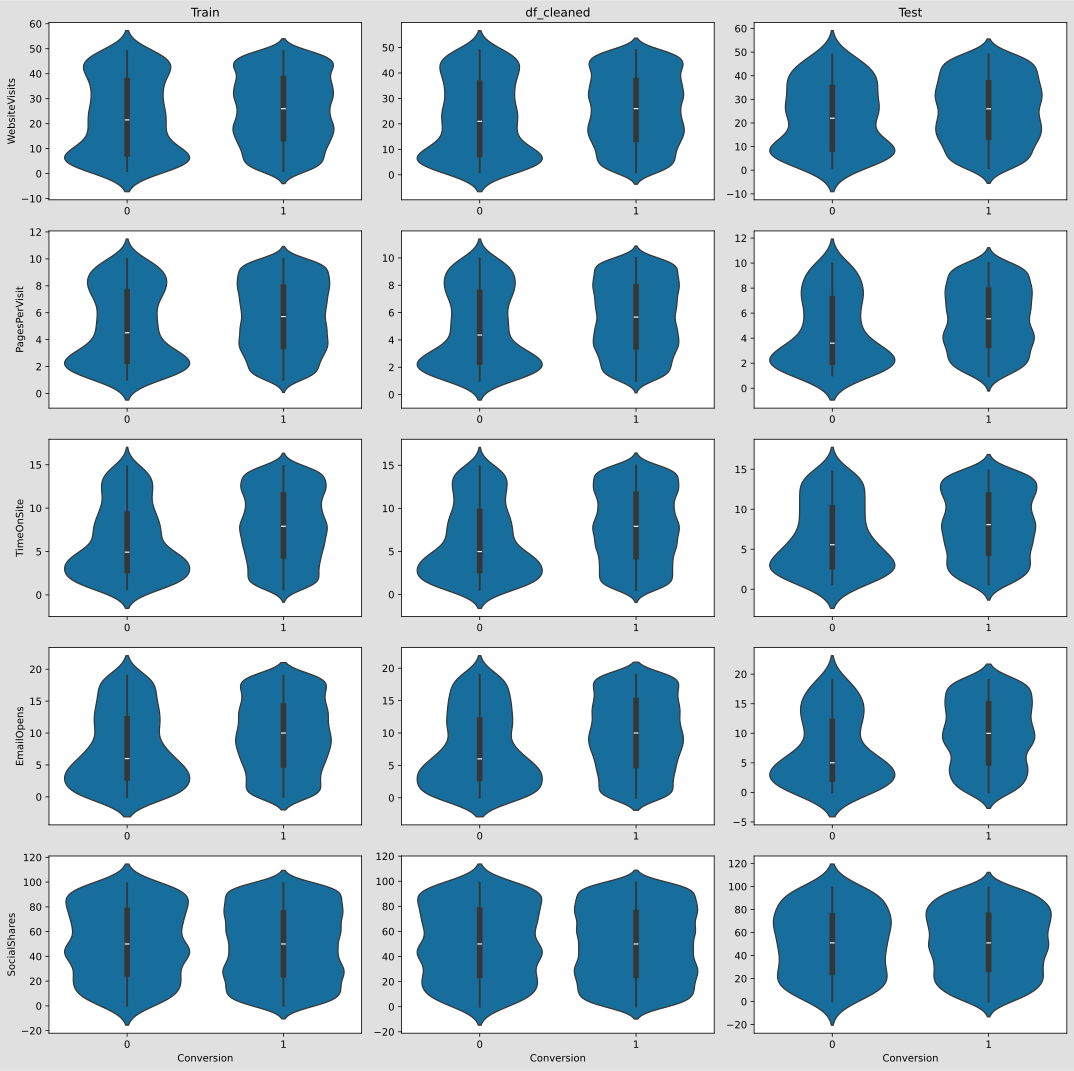

In [ ]:
metrics = ['WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'EmailOpens', 'SocialShares']
datasets = {'Train': Train, 'df_cleaned': df_cleaned, 'Test': Test}  # Switched order

fig, axes = plt.subplots(len(metrics), len(datasets), figsize=(15, 15))

for i, metric in enumerate(metrics):
    for j, (dataset_name, dataset) in enumerate(datasets.items()):
        # In all cases, the x-axis should be the 'Conversion' column from the current dataset
        # and the y-axis should be the current 'metric' column from the current dataset.
        sns.violinplot(x=dataset['Conversion'], y=dataset[metric], ax=axes[i, j])

        # Only title the top-most plots
        if i == 0:
            axes[i, j].set_title(dataset_name)

        # Only label the left-most plots
        if j == 0:
            axes[i, j].set_ylabel(metric)
        else:
            axes[i, j].set_ylabel('')

        # Remove x-axis labels for all but the last row
        if i < len(metrics) - 1:
            axes[i, j].set_xlabel('')

plt.tight_layout()
plt.show()

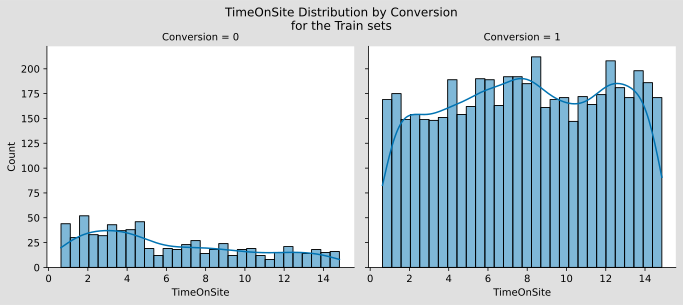

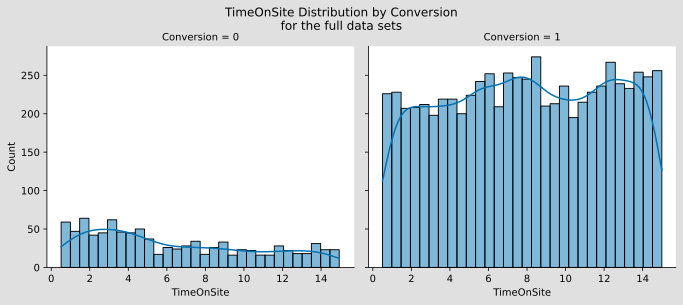

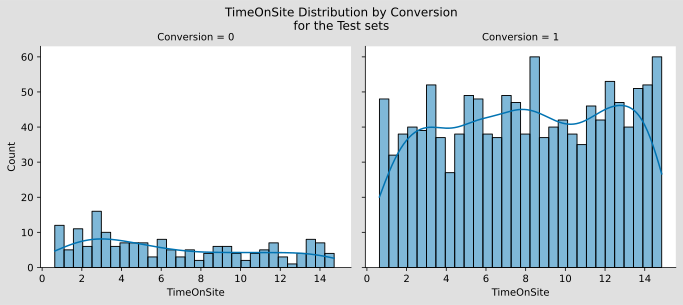

In [ ]:
g = sns.FacetGrid(Train, col='Conversion', height=4, aspect=1.2)
g.map(sns.histplot, 'TimeOnSite', bins=30, kde=True)
g.fig.suptitle("TimeOnSite Distribution by Conversion\nfor the Train sets", y=1.05)
plt.show()
g = sns.FacetGrid(df_cleaned, col='Conversion', height=4, aspect=1.2)
g.map(sns.histplot, 'TimeOnSite', bins=30, kde=True)
g.fig.suptitle("TimeOnSite Distribution by Conversion\nfor the full data sets", y=1.05)
plt.show()
g = sns.FacetGrid(Test, col='Conversion', height=4, aspect=1.2)
g.map(sns.histplot, 'TimeOnSite', bins=30, kde=True)
g.fig.suptitle("TimeOnSite Distribution by Conversion\nfor the Test sets", y=1.05)
plt.show()


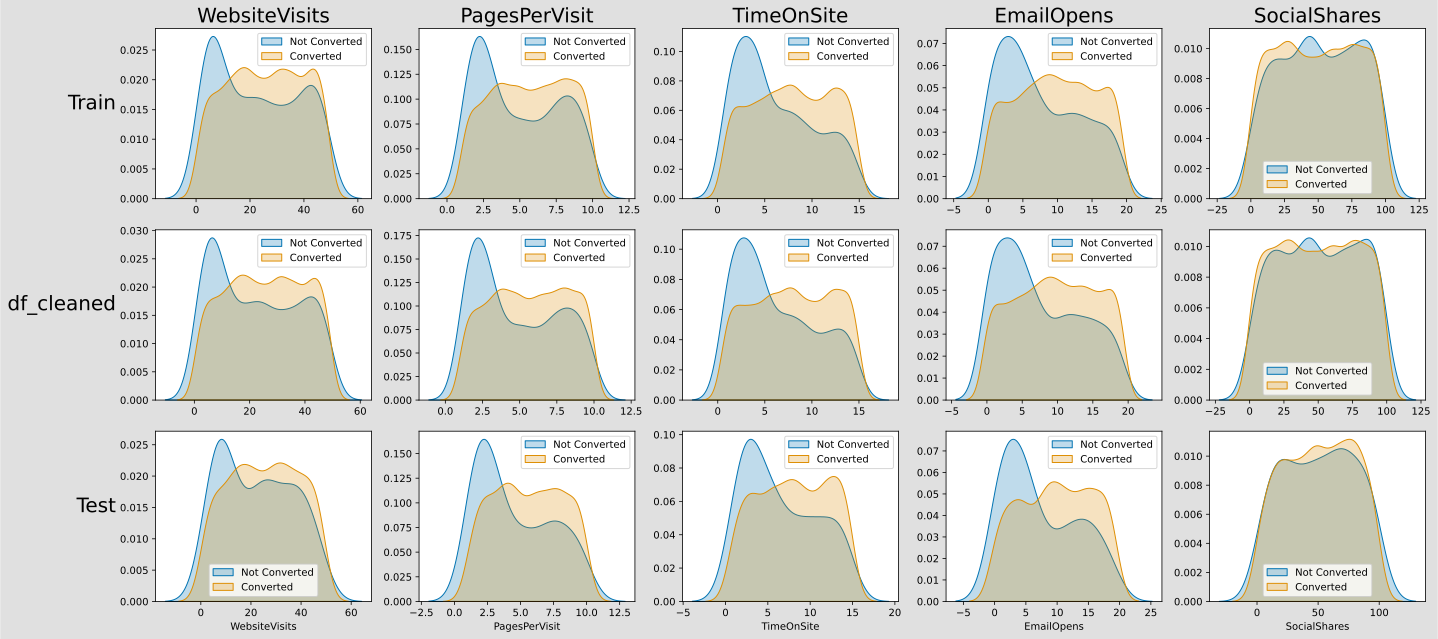

In [ ]:
metrics = ['WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'EmailOpens', 'SocialShares']
datasets = {'Train': Train, 'df_cleaned': df_cleaned, 'Test': Test}

# Switched the order: rows correspond to datasets, columns correspond to metrics
fig, axes = plt.subplots(len(datasets), len(metrics), figsize=(len(metrics) * 4, len(datasets) * 3))

# Adjusted the loops to iterate through datasets in the outer loop and metrics in the inner loop
for i, (dataset_name, dataset) in enumerate(datasets.items()):
    for j, metric in enumerate(metrics):
        ax = axes[i, j]

        # Plot KDE for 'Not Converted' (Conversion == 0)
        sns.kdeplot(data=dataset[dataset['Conversion'] == 0], x=metric, label='Not Converted', fill=True, ax=ax)

        # Plot KDE for 'Converted' (Conversion == 1)
        sns.kdeplot(data=dataset[dataset['Conversion'] == 1], x=metric, label='Converted', fill=True, ax=ax)

        # Add titles and labels (adjusted for swapped rows and columns)
        if i == 0:
            # Title the top-most plots with the metric name
            ax.set_title(metric, fontsize=20)

        if j == 0:
            # Label the left-most plots with the dataset name
            ax.set_ylabel(dataset_name, fontsize=20, rotation=0, ha='right')
        else:
            ax.set_ylabel('') # Only label the leftmost plots

        if i < len(datasets) - 1:
            # Remove x-axis labels for all but the last row
             ax.set_xlabel('')
        else:
            # Label the x-axis for the last row plots with the metric name
             ax.set_xlabel(metric)


        ax.legend()

plt.tight_layout()
# If you want to save the figure, uncomment the line below:
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/MISY331/kde_plots_swapped.png')
plt.show()

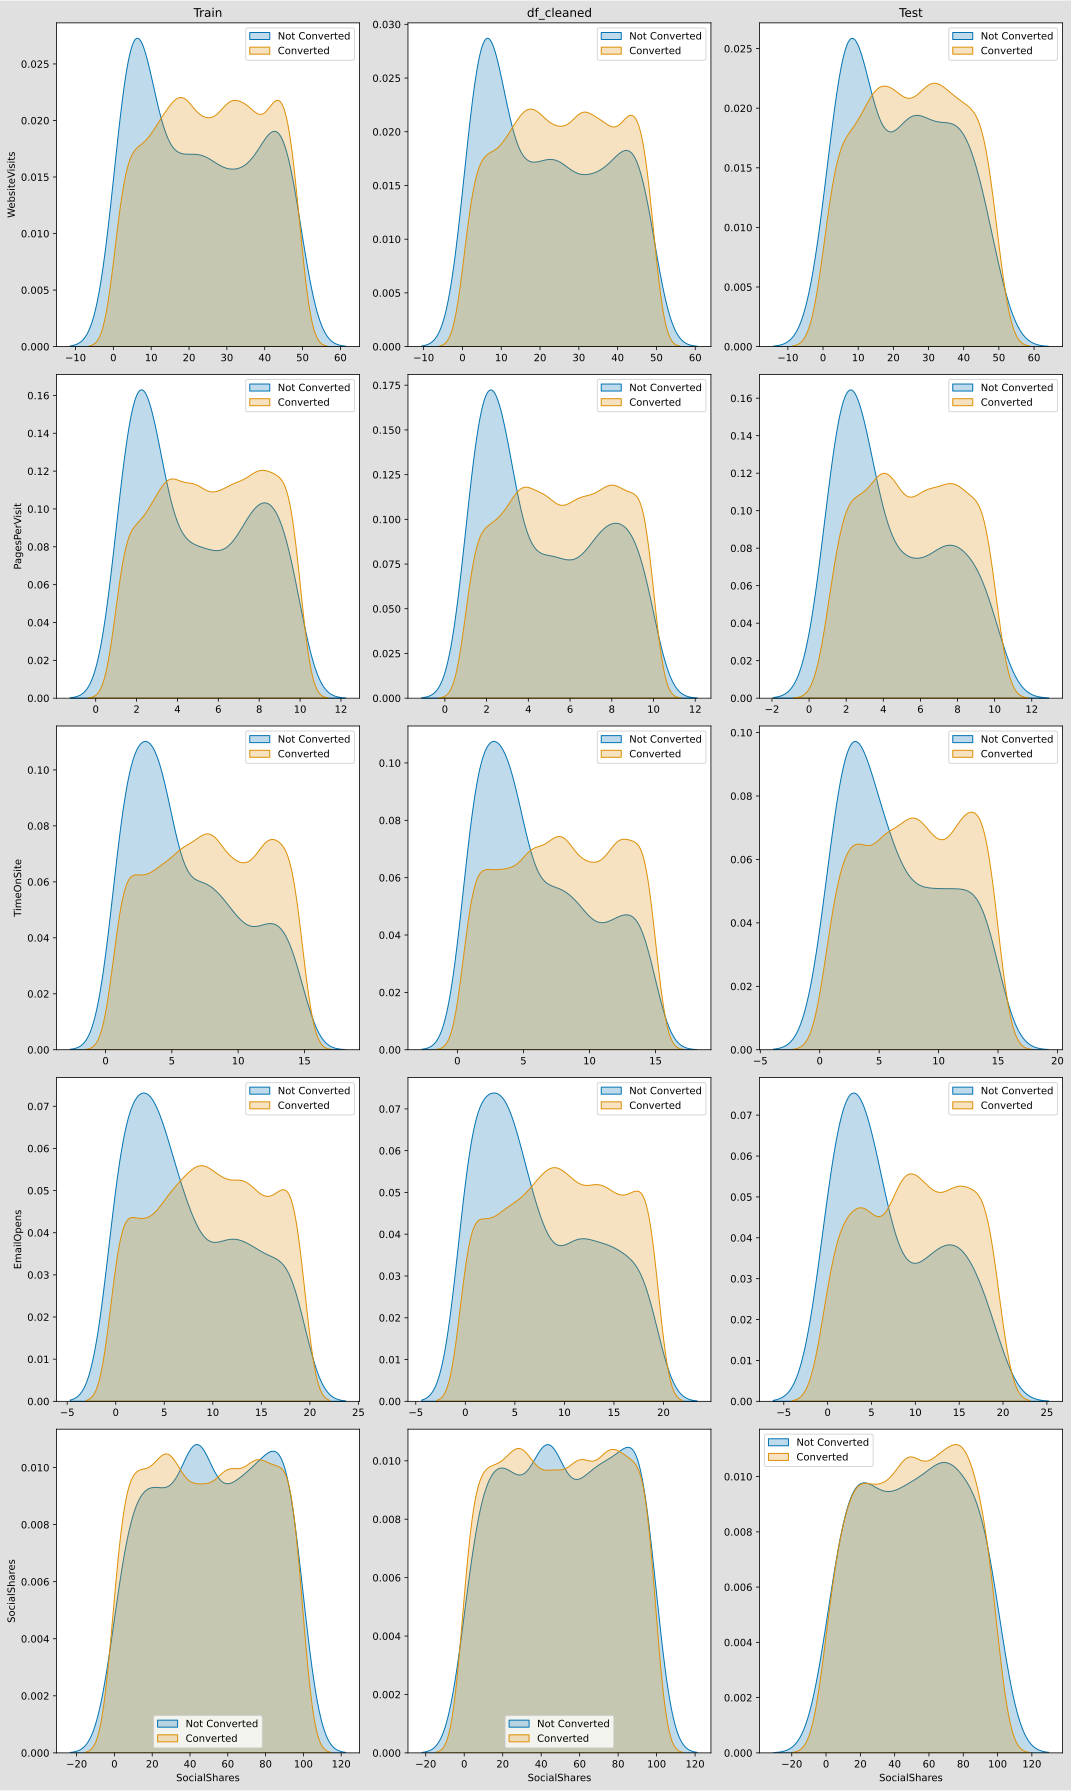

In [ ]:
metrics = ['WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'EmailOpens', 'SocialShares']
datasets = {'Train': Train, 'df_cleaned': df_cleaned, 'Test': Test}

fig, axes = plt.subplots(len(metrics), len(datasets), figsize=(15, len(metrics) * 5))

for i, metric in enumerate(metrics):
    for j, (dataset_name, dataset) in enumerate(datasets.items()):
        ax = axes[i, j]

        # Plot KDE for 'Not Converted' (Conversion == 0)
        sns.kdeplot(data=dataset[dataset['Conversion'] == 0], x=metric, label='Not Converted', fill=True, ax=ax)

        # Plot KDE for 'Converted' (Conversion == 1)
        sns.kdeplot(data=dataset[dataset['Conversion'] == 1], x=metric, label='Converted', fill=True, ax=ax)

        # Add titles and labels
        if i == 0:
            ax.set_title(dataset_name)

        if j == 0:
            ax.set_ylabel(metrics[i])
        else:
            ax.set_ylabel('') # Only label the leftmost plots

        if i < len(metrics) - 1:
             ax.set_xlabel('') # Remove x-labels for all but the last row
        else:
             ax.set_xlabel(metric)

        ax.legend()

plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/MISY331/kde_Metrics_plots.png')
plt.show()


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/MISY331/rf_model.p', 'rb') as f:
    RandonForest = pickle.load(f)
RandonForest

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

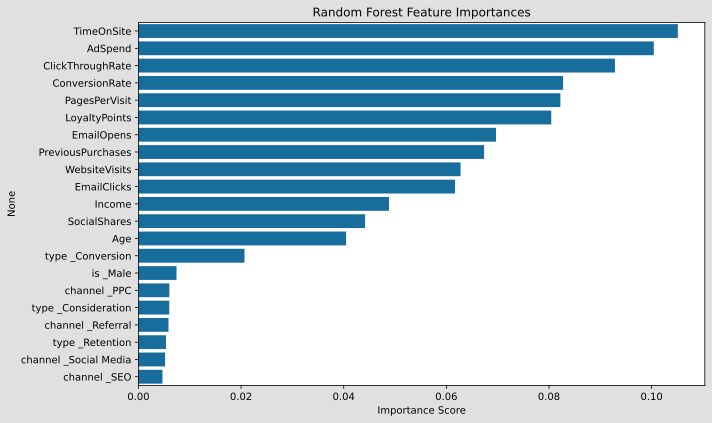

In [ ]:
importances = pd.Series(RandonForest.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

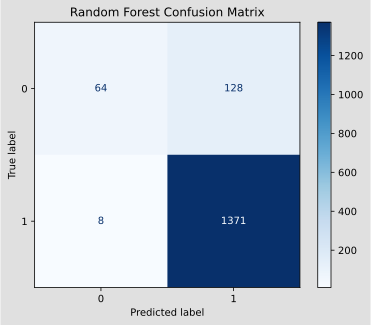

In [ ]:
y_pred = RandonForest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/MISY331/ridge_model.p', 'rb') as f:
    ridge = pickle.load(f)
ridge

RidgeClassifier(alpha=0.01)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from tqdm import tqdm

#Normalize Features
scaler = MinMaxScaler()
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Setup for ridge visualization
clf = Ridge(fit_intercept=True)
alphas = np.logspace(0, 6, 200)  # from 1 to 1,000,000
coefs = []

for a in tqdm(alphas):
    clf.set_params(alpha=a)
    clf.fit(X_train_norm, y_train)
    coefs.append(clf.coef_)

100%|██████████| 200/200 [00:00<00:00, 241.73it/s]


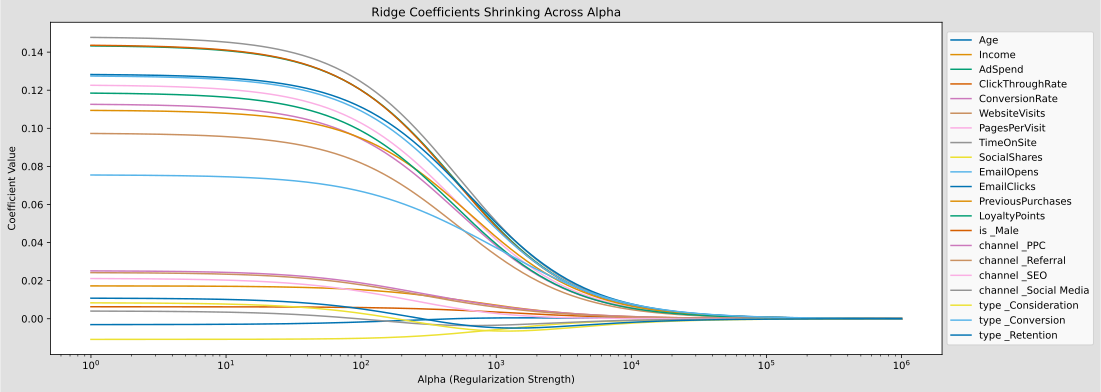

In [ ]:
#Plot the Results
plt.figure(figsize=(16, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Coefficient Value")
plt.title("Ridge Coefficients Shrinking Across Alpha")
plt.axis("tight")
ax.legend(labels=X_train.columns.tolist(), loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/MISY331/xgb_model.p', 'rb') as f:
    xgb = pickle.load(f)
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/MISY331/clustering_model.p', 'rb') as f:
    ANMS = pickle.load(f)
ANMS

KMeans(init='random', max_iter=5000, n_clusters=2, random_state=1234, tol=0.001)

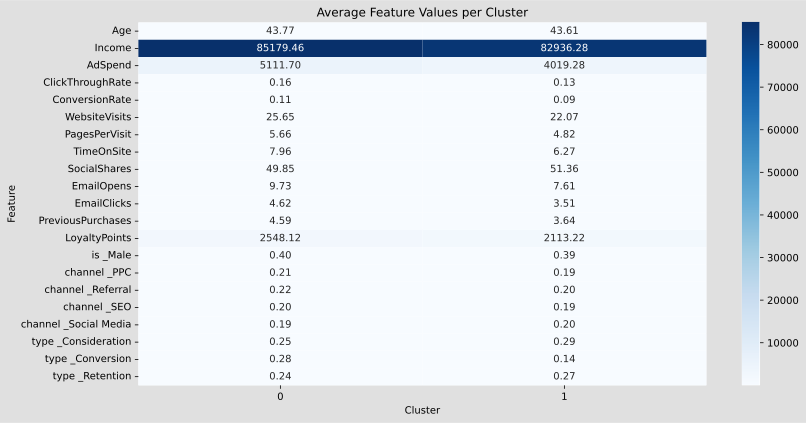

In [ ]:
clustered_df = X_train.copy()
clustered_df['Cluster'] = ANMS.labels_

# Compute mean per cluster
mean_by_cluster = clustered_df.groupby('Cluster').mean()

# Plot as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(mean_by_cluster.T, cmap="Blues", annot=True, fmt=".2f")
plt.title("Average Feature Values per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

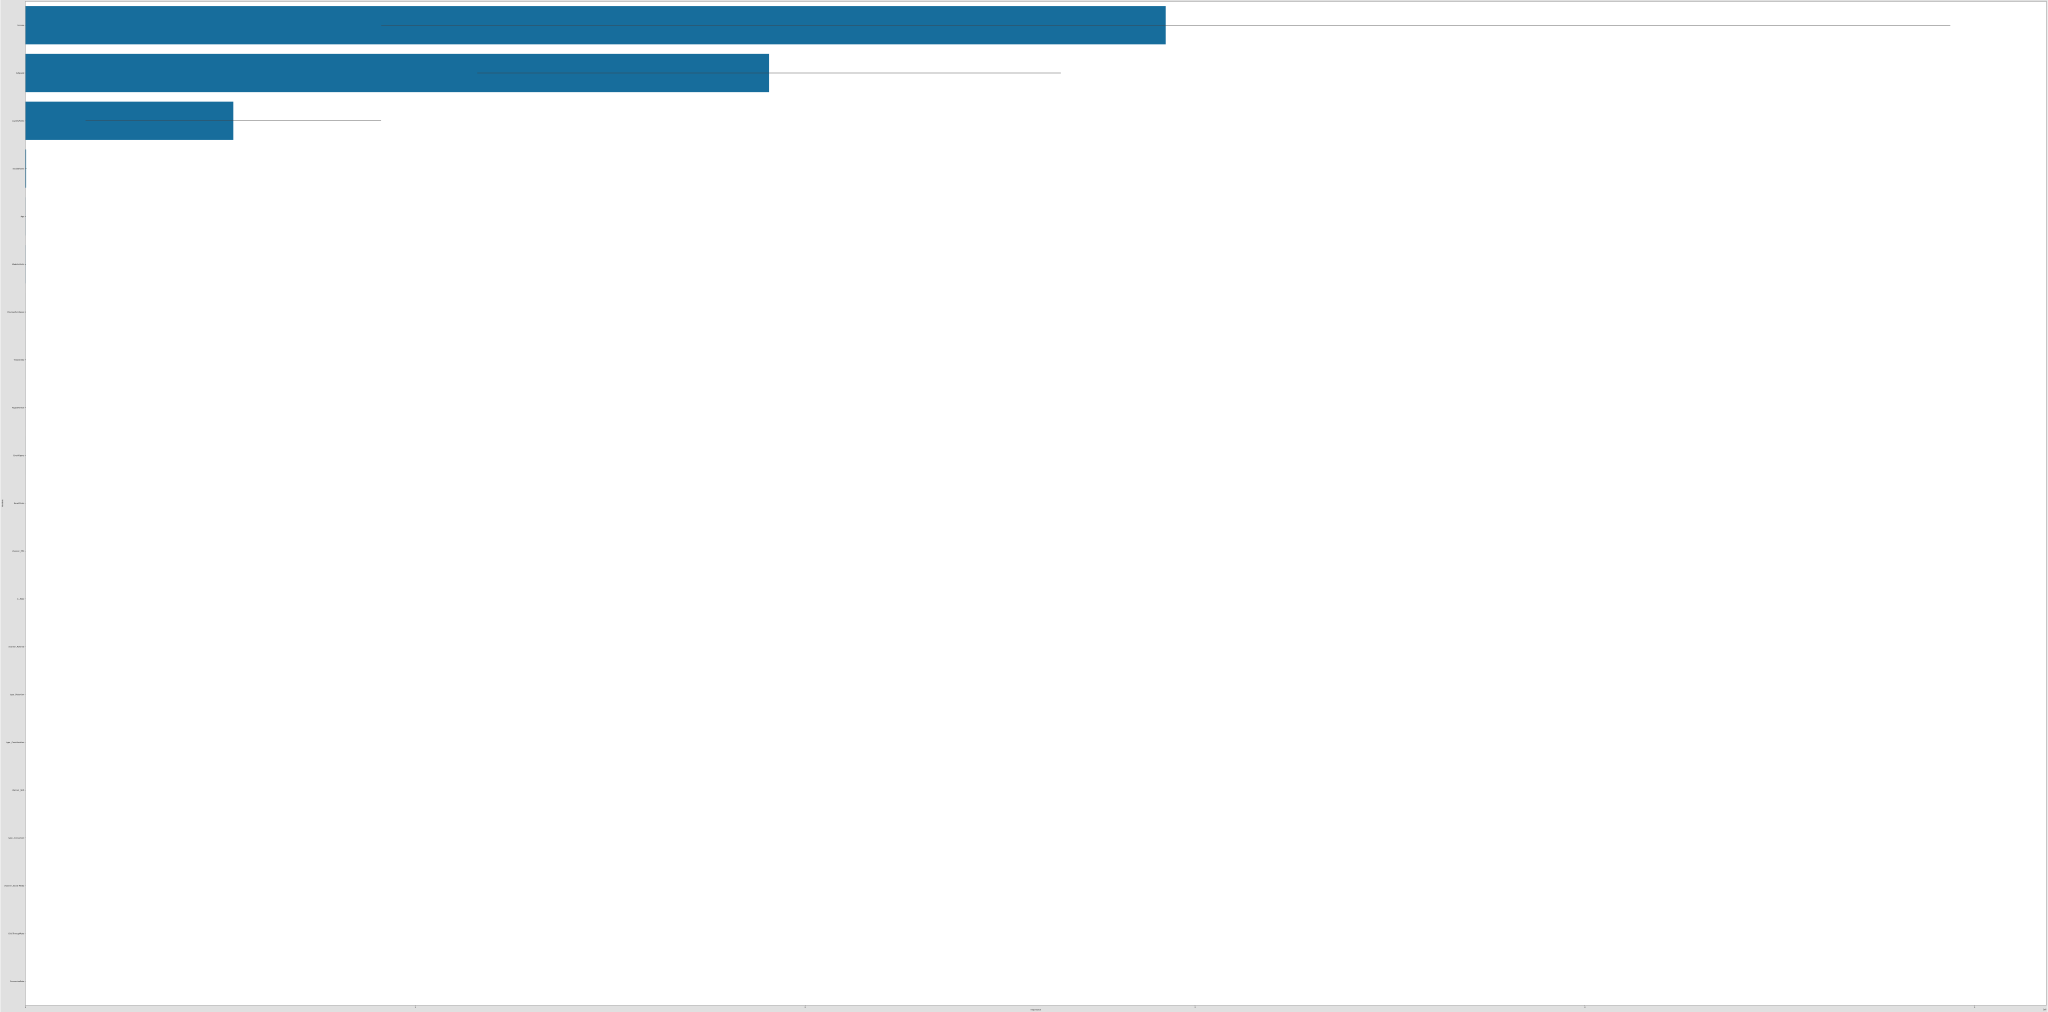

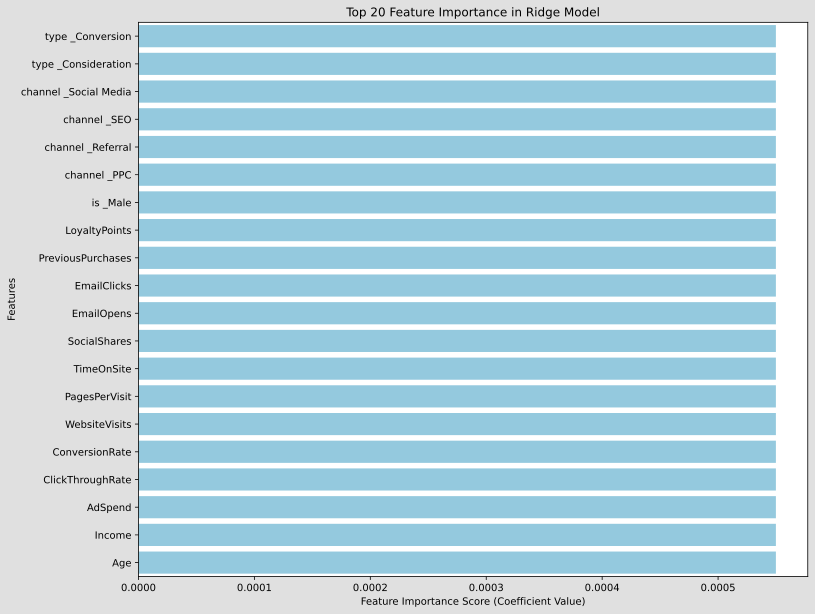

100%|██████████| 200/200 [00:01<00:00, 103.37it/s]


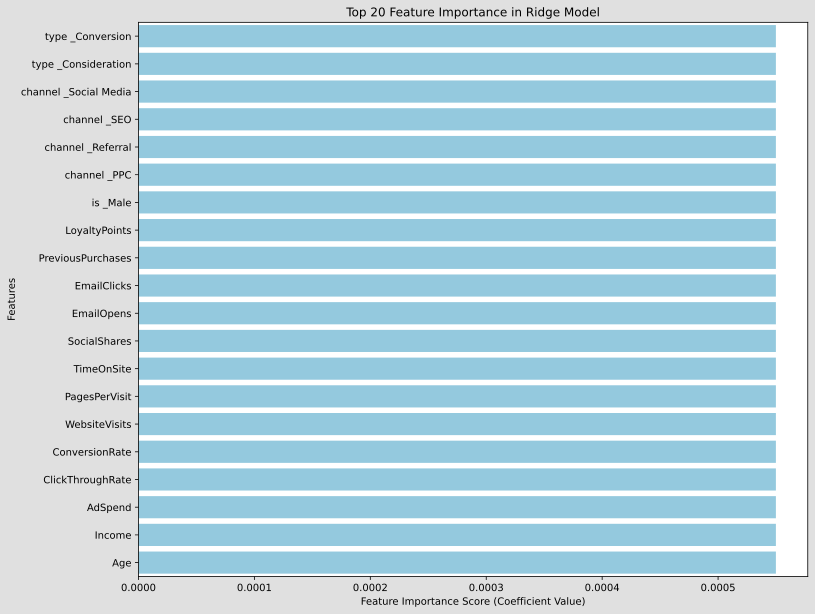

In [ ]:
from sklearn.cluster import KMeans
from sklearn.linear_model import RidgeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
kmns = KMeans(n_clusters = 2,
              max_iter = 5000,
              tol=0.001,
              init = 'random',
              n_init= 'auto',
              random_state = rs)

kmns = kmns.fit(X_train)
perm_import = permutation_importance(kmns,          ## The Model we are evaluating
                                     X_train,
                                     y_train,
                                     n_repeats=5,       ## The Number of shuffles (permutations) to do
                                     random_state=rs)
perm_import_df = pd.DataFrame(perm_import['importances'].transpose(),
                                 columns = kmns.feature_names_in_)
## Melt as before to Tidy Data
perm_import_df_mlt = perm_import_df.melt(value_vars=kmns.feature_names_in_,
                                         var_name='Variable',
                                         value_name='Importance').sort_values(by = 'Importance', ascending= False)
## Melt as before to Tidy Data
## I'm filtering to reduce the features dipslayed
sns.barplot(data = perm_import_df_mlt[perm_import_df_mlt['Importance'] > 0.01],
            y = 'Variable',
            x = 'Importance',
            errorbar = 'sd')
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='skyblue')
plt.xlabel("Feature Importance Score (Coefficient Value)")
plt.ylabel("Features")
plt.title("Top 20 Feature Importance in Ridge Model")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show();


## We know we want 3 clusters: converted and did not convert
kmns = KMeans(n_clusters = 2,
              max_iter = 5000,
              tol=0.001,
              init = 'random',
              n_init= 'auto',
              random_state = rs)

kmns = kmns.fit(X_train)

## Generate Predictions
y_train_hat = kmns.predict(X_train)
y_test_hat = kmns.predict(X_test)

## The total, negative inertia of the given X sets
kmns.score(X_train), kmns.score(X_test)

clf = RidgeClassifier(fit_intercept=True, class_weight='balanced')

# Define a range of alpha values for regularization
alphas = np.logspace(0, 5, 200)
coefs = []

# Loop through different alpha values, train the model, and store coefficients
for a in tqdm(alphas):
    clf.set_params(alpha=a)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_[0])

# Calculate feature importances from the final trained model (or the last alpha)
# Note: In a real analysis, you might choose an alpha based on cross-validation
importances = clf.coef_[0]
feature_names = X_train.columns # Use column names from the loaded X_train

# Create a DataFrame to visualize feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance (descending order) and keep only the top 20
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot bar chart of top 20 feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='skyblue')
plt.xlabel("Feature Importance Score (Coefficient Value)")
plt.ylabel("Features")
plt.title("Top 20 Feature Importance in Ridge Model")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [ ]:
"""with open("/content/drive/MyDrive/Colab Notebooks/MISY331/BN_model.p", 'rb') as f:
    bnc = pickle.load(f)
bnc"""

import pyagrum.bn as bn

with open("/content/drive/MyDrive/Colab Notebooks/MISY331/BN_model.p", 'rb') as f:
    bnc = pickle.load(f)




ModuleNotFoundError: No module named 'pyagrum.bn'

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/MISY331/NN_model.p', 'rb') as f:
    NN = pickle.load(f)
NN

MLPClassifier(hidden_layer_sizes=[7, 7, 9], max_iter=500, random_state=1234)

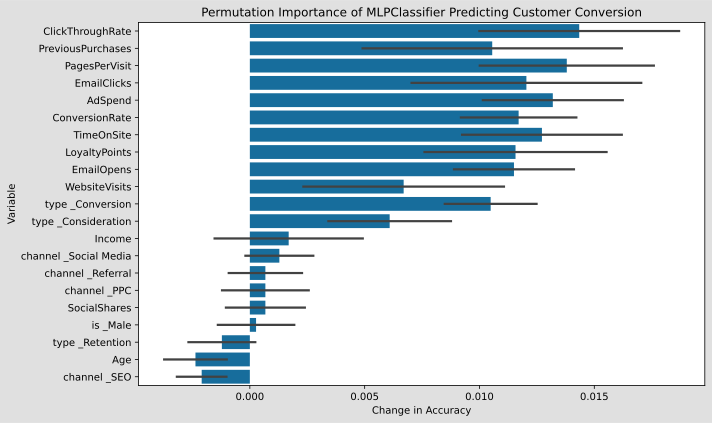

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Fit NN on scaled training data
NN.fit(X_train_scaled, y_train)

# Step 3: Run permutation importance on the test set
perm_import = permutation_importance(
    NN,
    X_test_scaled,
    y_test,  # correct labels for X_test
    n_repeats=10,
    n_jobs=-1,
    random_state=1234
)

# Step 4: Prepare long-form DataFrame for seaborn
perm_import_df = pd.DataFrame(perm_import.importances.T, columns=X_train.columns)

perm_import_df_mlt = perm_import_df.melt(
    value_vars=X_train.columns,
    var_name='Variable',
    value_name='Importance'
)

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=perm_import_df_mlt.sort_values(by="Importance", ascending=False), y='Variable', x='Importance', errorbar='sd')
plt.xlabel("Change in Accuracy")
plt.title("Permutation Importance of MLPClassifier Predicting Customer Conversion")
plt.tight_layout()
plt.show()

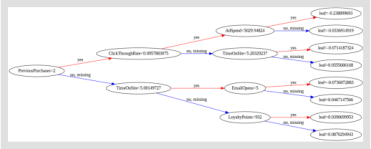

In [ ]:
booster = xgb.get_booster()
plot_tree(booster, num_trees=0, rankdir='LR')
plt.rcParams['figure.figsize'] = [200, 100]
plt.show()

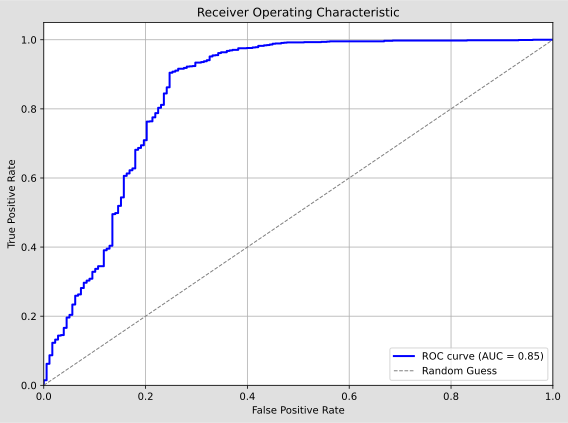

In [ ]:
from sklearn.metrics import roc_curve, auc

y_true = y_test
y_proba = xgb.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_true, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

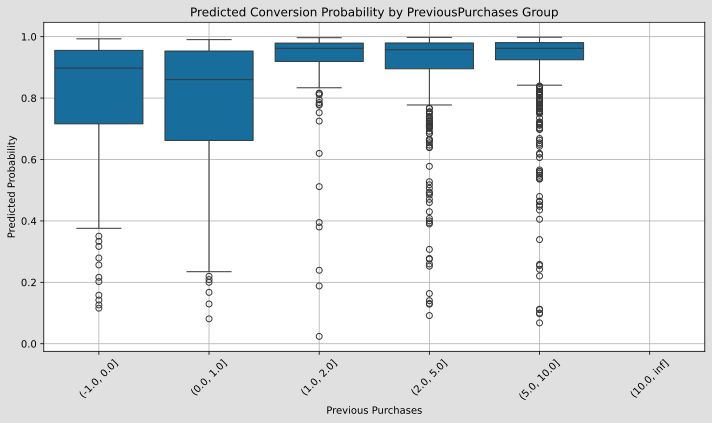

In [ ]:
y_probs = xgb.predict_proba(X_test)[:, 1]

X_test_copy = X_test.copy()
X_test_copy['PredictedProb'] = y_probs
X_test_copy['PreviousPurchasesGroup'] = pd.cut(X_test_copy['PreviousPurchases'], bins=[-1, 0, 1, 2, 5, 10, float('inf')])

plt.figure(figsize=(10, 6))
sns.boxplot(data=X_test_copy, x='PreviousPurchasesGroup', y='PredictedProb')
plt.title("Predicted Conversion Probability by PreviousPurchases Group")
plt.xlabel("Previous Purchases")
plt.ylabel("Predicted Probability")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

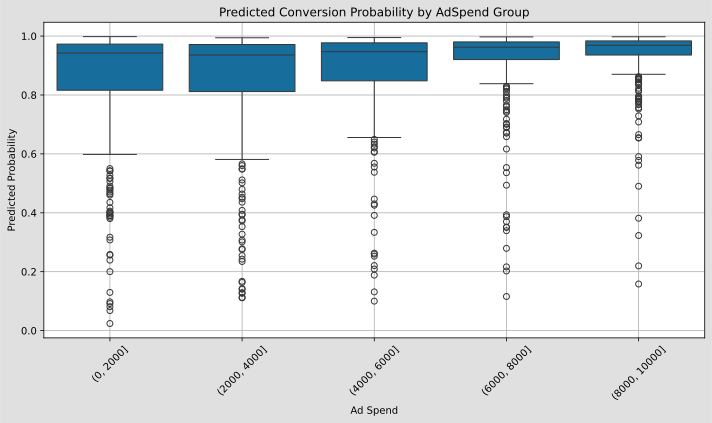

In [ ]:
y_probs = xgb.predict_proba(X_test)[:, 1]

X_test_copy = X_test.copy()
X_test_copy['PredictedProb'] = y_probs

X_test_copy['AdSpendGroup'] = pd.cut(X_test_copy['AdSpend'], bins=[0, 2000, 4000, 6000, 8000, 10000])

plt.figure(figsize=(10, 6))
sns.boxplot(data=X_test_copy, x='AdSpendGroup', y='PredictedProb')
plt.title("Predicted Conversion Probability by AdSpend Group")
plt.xlabel("Ad Spend")
plt.ylabel("Predicted Probability")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
importances = pd.Series(xgb.feature_importances_, index=X_train.columns)

importances_top = importances.sort_values(ascending=False).head(6)
importances_top = importances_top.drop(columns = 'PreviousPurchases')
top_features = importances_top.index.tolist()

X_plot = X_test.copy()
X_plot['Conversion'] = y_test

sns.pairplot(X_plot[top_features + ['Conversion']], hue='Conversion', corner=True, plot_kws={'alpha': 0.5, 's': 15})
plt.suptitle("Pairplot of Top Features by Importance", y=1.02)
plt.show()

<ipython-input-65-81e214b412e8>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=feature)


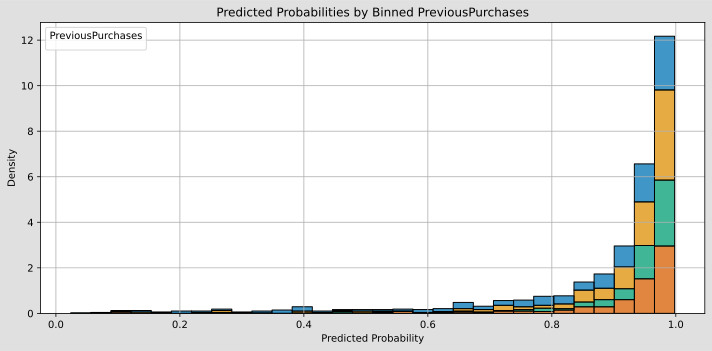

<ipython-input-65-81e214b412e8>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=feature)


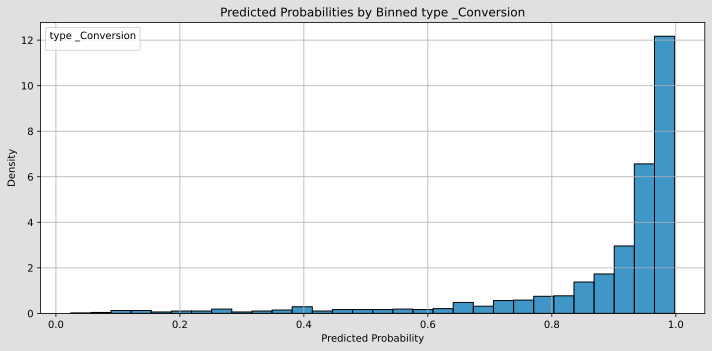

<ipython-input-65-81e214b412e8>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=feature)


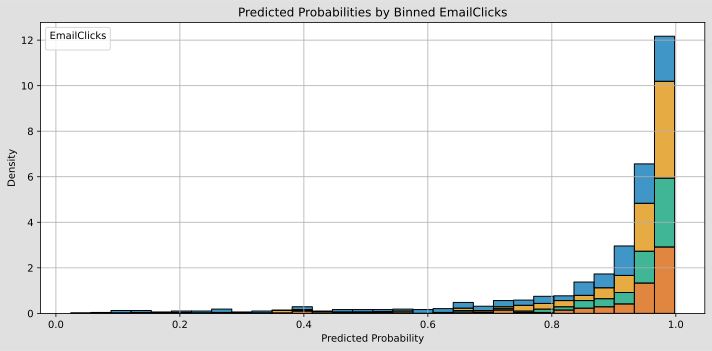

<ipython-input-65-81e214b412e8>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=feature)


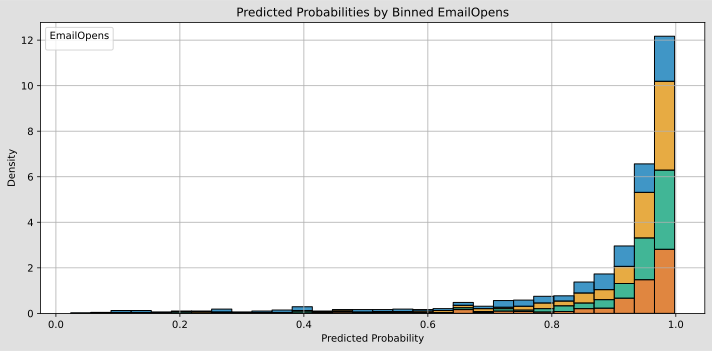

<ipython-input-65-81e214b412e8>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=feature)


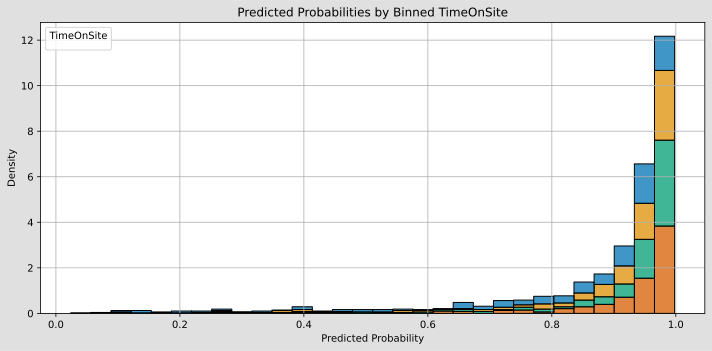

<ipython-input-65-81e214b412e8>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=feature)


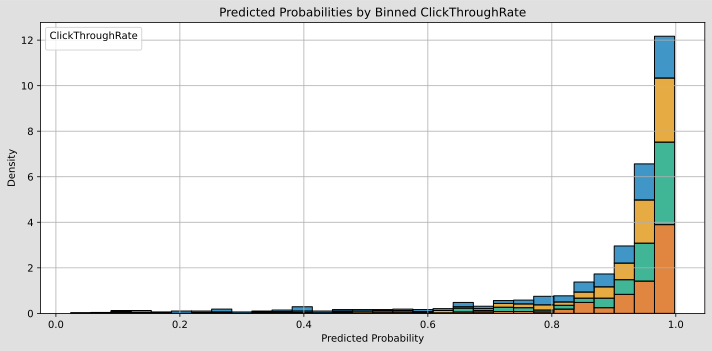

<ipython-input-65-81e214b412e8>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=feature)


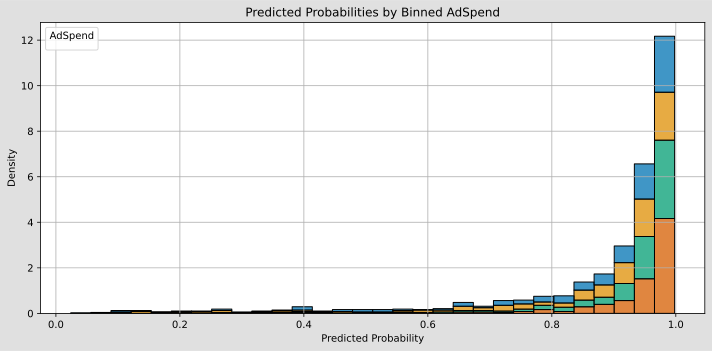

<ipython-input-65-81e214b412e8>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=feature)


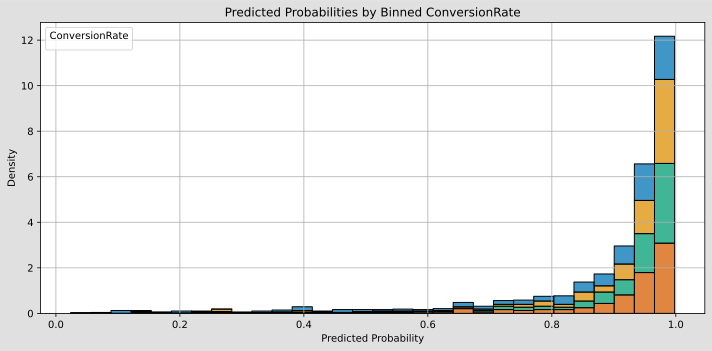

<ipython-input-65-81e214b412e8>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=feature)


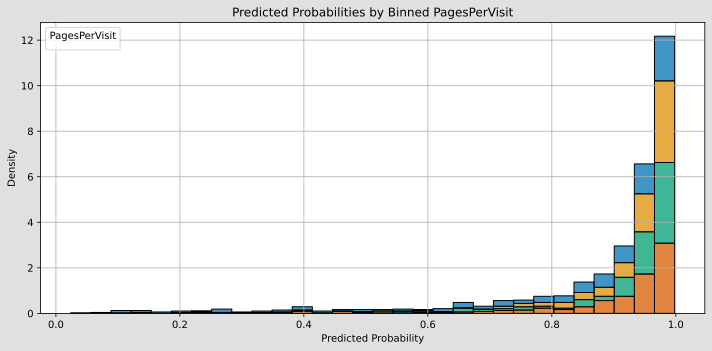

<ipython-input-65-81e214b412e8>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=feature)


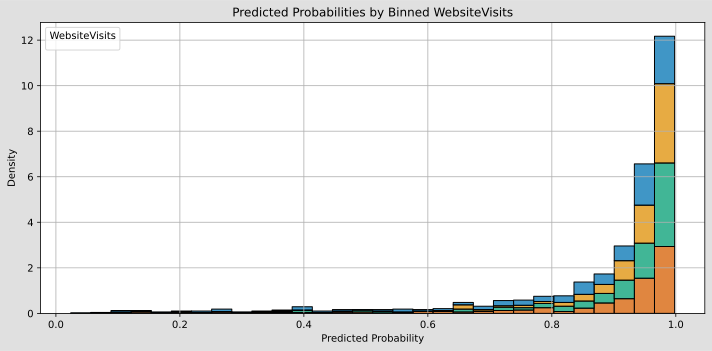

<ipython-input-65-81e214b412e8>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=feature)


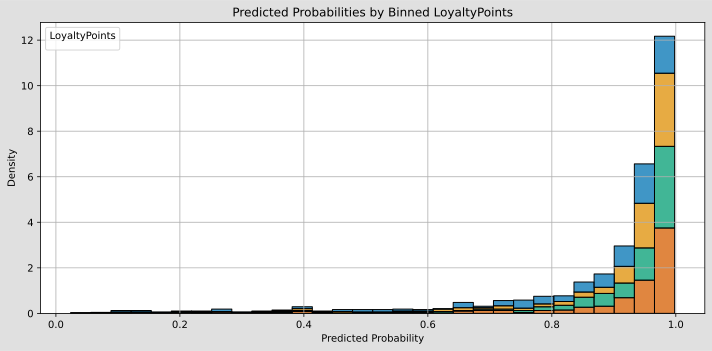

In [ ]:
y_probs = xgb.predict_proba(X_test)[:, 1]
top_features = ['PreviousPurchases', 'type _Conversion', 'EmailClicks', 'EmailOpens', 'TimeOnSite', 'ClickThroughRate', 'AdSpend','ConversionRate','PagesPerVisit','WebsiteVisits','LoyaltyPoints']
X_test_copy = X_test.copy()
X_test_copy['PredictedProb'] = y_probs
X_test_copy['Conversion'] = y_test

for feature in top_features:
    bin_col = f'{feature}_bin'

    X_test_copy[bin_col] = pd.qcut(X_plot[feature], q=4, duplicates='drop')

    plt.figure(figsize=(10, 5))
    sns.histplot(data=X_test_copy, x='PredictedProb', hue=bin_col, multiple='stack', bins=30, stat='density')
    plt.title(f'Predicted Probabilities by Binned {feature}')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Density')
    plt.legend(title=feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

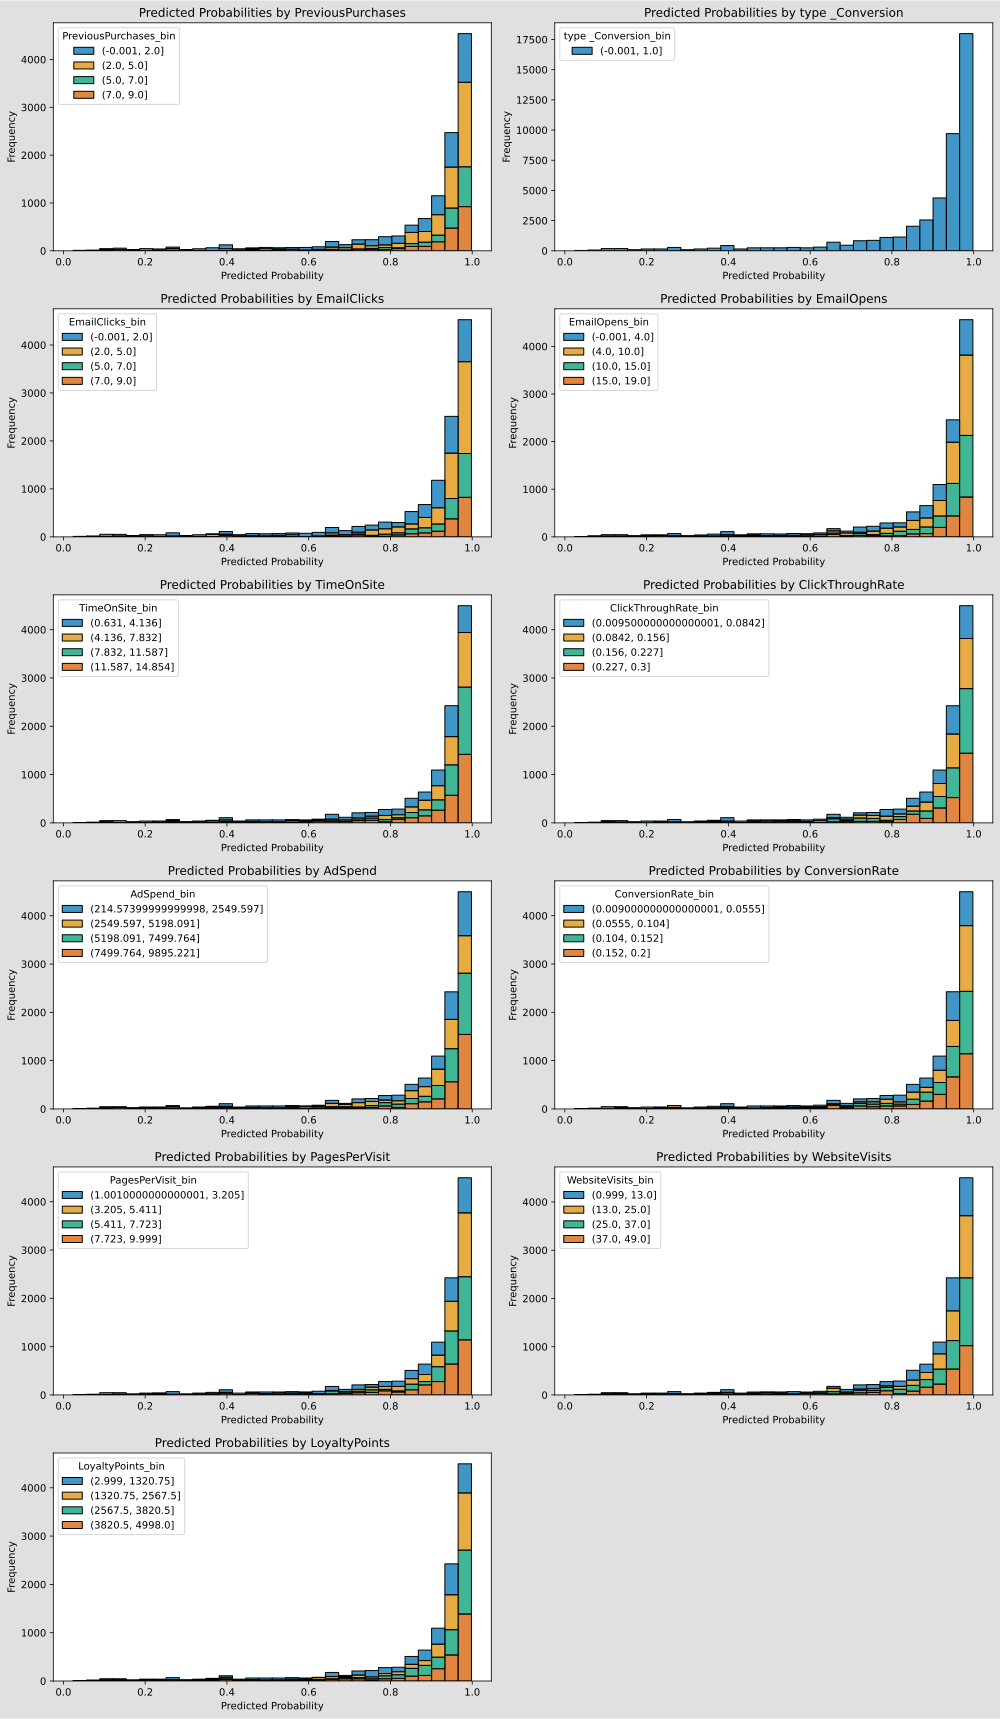

In [ ]:
# Step 1: Create prediction column
y_probs = xgb.predict_proba(X_test)[:, 1]
X_plot = X_test.copy()
X_plot['PredictedProb'] = y_probs

# Choose top features that exist
top_features = ['PreviousPurchases', 'type _Conversion', 'EmailClicks', 'EmailOpens', 'TimeOnSite', 'ClickThroughRate', 'AdSpend','ConversionRate','PagesPerVisit','WebsiteVisits','LoyaltyPoints']

# Step 2: Create subplots
n = len(top_features)
n_cols = 2
n_rows = (n + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

# Step 3: Plot each histogram
for i, feature in enumerate(top_features):
    bin_col = f'{feature}_bin'

    # Bin into quantiles
    X_plot[bin_col] = pd.qcut(X_plot[feature], q=4, duplicates='drop')

    sns.histplot(
        data=X_plot,
        x='PredictedProb',
        hue=bin_col,
        multiple='stack',
        bins=30,
        stat='frequency',
        ax=axes[i]
    )
    axes[i].set_title(f'Predicted Probabilities by {feature}')
    axes[i].set_xlabel('Predicted Probability')
    axes[i].set_ylabel('Frequency')

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()